In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [26]:
from sklearn.svm import SVC
from sklearn import datasets 
import os
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm, metrics
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [27]:
from tensorflow.keras.datasets import mnist

In [28]:
# IMPORT IMAGES IN VARIABLE FOR TRAINING AND TESTING


train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Split data to train and predict also normalize and reshape data
train_images = train_images.reshape((60000,28*28))#CONVERT IN 2 DIMENSIONS
train_images = train_images.astype('float32')/255 #normalize in between 0 and 1
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [29]:
# To get only 1 and 7 digit for training

train_digits = (train_labels == 1 ) | (train_labels == 7)

X = train_images[train_digits]
Y = train_labels[train_digits]

#Hard Margin SVM
model = svm.SVC(kernel="linear", C=float("inf"), gamma=0.05).fit(X,Y) 

In [42]:
# To get only 1 and 7 digit for testing
test_digits = (test_labels == 1) | (test_labels == 7)
x_test = test_images[test_digits]
y_true = test_labels[test_digits]#true value
y_pred = model.predict(x_test) #Predicted value

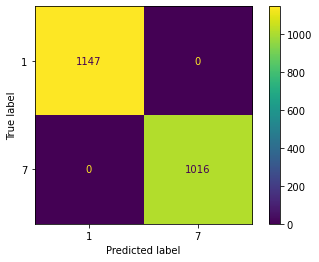

In [43]:
# Plotting confusion matrix of predicted and true values

plot_confusion_matrix(model, x_test, y_pred)  
plt.show() 

In [44]:
# soft Margin svm
clf = SVC(probability=False, kernel="rbf", C=2.8, gamma=0.0073).fit(X,Y)

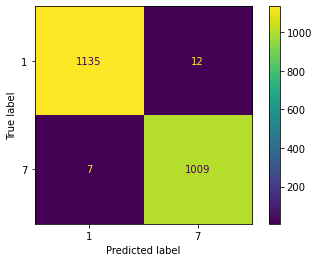

In [45]:
plot_confusion_matrix(clf, x_test, y_pred)  
plt.show()

In [46]:
# polynomial kernel
classifier = SVC(kernel ='poly', degree = 4).fit(X,Y)

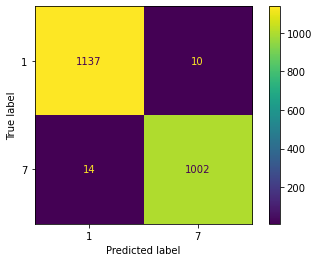

In [47]:
plot_confusion_matrix(classifier, x_test, y_pred)  
plt.show()

In [48]:
# linear kernel
linear_cls=SVC(kernel ='linear').fit(X,Y)

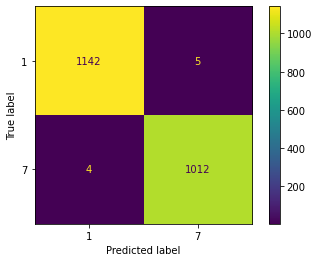

In [49]:
plot_confusion_matrix(linear_cls, x_test, y_pred)  
plt.show()

In [50]:
# for all digits allvsall will apply

In [51]:
(x_images, x_labels), (y_images, y_labels) = mnist.load_data()
x_images = x_images.reshape((60000,28*28))#CONVERT IN 2 DIMENSIONS
x_images = x_images.astype('float32')/255 #normalize in between 0 and 1
y_images = y_images.reshape((10000,28*28))
y_images = y_images.astype('float32')/255

In [52]:
clf = OneVsRestClassifier(SVC()).fit(x_images, x_labels)

In [53]:
ava_clf = clf.predict(y_images)

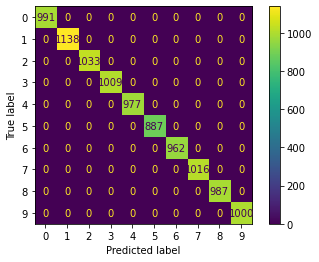

In [56]:
plot_confusion_matrix(clf, y_images, ava_clf)  
plt.show()

In [60]:
from sklearn.metrics import accuracy_score
# Accuracy test for digit 1 and 7
accuracy_score(y_true, y_pred)

0.9916782246879334

In [61]:
# accuracy of all digits
accuracy_score(y_labels, ava_clf)

0.98

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1135
           7       1.00      0.99      0.99      1028

    accuracy                           0.99      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.99      0.99      0.99      2163



In [78]:
print(classification_report(y_labels, ava_clf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

